In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string



In [2]:
# import and read dataset from https://www.kaggle.com/amruthjithrajvr/recruitment-scam
data = pd.read_csv("DataSet.csv")

In [3]:
# let's read the first top 5 rows from the dataset
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [4]:
# let's get the number of data points (rows) and the number of categories (columns)
data.shape

(17880, 18)

In [5]:
# determine the different categories being assessed
data.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset'],
      dtype='object')

In [6]:
# in every column, let's see how many missing values there are
data.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64

In [7]:
# remove irrelevant columns
# axis=1 means the values are column values 
# inplace=true will make the changes permanent
data.drop(['salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'in_balanced_dataset'], axis=1, inplace=True)

In [8]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,Other,Internship,NaN,NaN,Marketing,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,NaN,NaN,NaN,NaN,NaN,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f


In [9]:
# replace the NaN values with blank spaces
# inplace=True will make this change permanent
data.fillna(' ', inplace=True)

In [10]:
# create independent and dependent features
columns = data.columns.tolist()

# filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraudulent"]]

# store the variable (fraudulent) we are predicting
target = "fraudulent"

# define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
X_res, Y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
df3 = pd.DataFrame(Y_res)

# the default behavior is join='outer' so we must change it to inner

result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data = result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
2875,Director of Training,"US, NJ, Newark",,<p>Places Senior Technology and Data professio...,<p>Reporting to Vice President of Professional...,<p>Requirements:<br><br>• Bachelor’s Degree re...,<p>Comprehensive Full time Benefits</p>,Full-time,Director,Bachelor's Degree,Information Technology and Services,Training,f
10809,Customer Service Associate,"US, CO, Englewood",,"<p>Novitex Enterprise Solutions, formerly Pitn...",<p>The Customer Service Associate will be base...,<p><b>Minimum Requirements:</b></p>\r\n<ul>\r\...,,Full-time,Entry level,High School or equivalent,Financial Services,Administrative,f
7704,Automotive Sales Manager,"US, CA, Costa Mesa",Sales,About HitFigure:\r\n\r\nFranchised car dealers...,<p>HitFigure is going thru Explosive Growth! N...,<ul>\r\n<li>Automotive Internet Sales Managers...,,,,,,,f
15470,PHP Developers,"NZ, , Auckland & Wellington",Fixed-term & Permanent,<p>SilverStripe CMS &amp; Framework is an open...,<p>If you want to build world-class web applic...,,,,,,,,f
4484,Epic Adventurist,"US, WI, WAUKESHA",,<p>Lasertag Adventure - Profile</p>,<p>Lasertag Adventure is looking for people wh...,<ul>\r\n<li>Outgoing and fun personality</li>\...,<ul>\r\n<li>Work in a FUN environment</li>\r\n...,Part-time,Entry level,Some High School Coursework,Entertainment,Other,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,<p>Student Positions Part-Time and Full-Time.<...,,,Part-time,,,,,t
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,<p><b>LEARN TO EARN AN EXECUTIVE LEVEL INCOME<...,<p><b>What You Can Do.</b></p>\r\n<p><b> </b><...,<p><b>Who We Are</b></p>\r\n<p><b> </b></p>\r\...,,,,,,t
17829,Android Developer,"PL, MZ, Warsaw",,,<p>inFullMobile Sp. z o.o. is a mobile softwar...,<p>• A proven track record in Android / JAVA p...,<ul>\r\n<li>attractive salary (adequate to the...,,,,,,t
17830,Payroll Clerk,"US, NY, New York",,,<p>JOB DESCRIPTION<br><br>We are seeking a ful...,<p><br>JOB REQUIREMENTS<br><br>• High schoo...,<p>We offer a competitive salary and benefits ...,Full-time,,,Apparel & Fashion,Accounting/Auditing,t


In [11]:
data.isnull().sum()
# we finished cleaning our dataset!!

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [12]:
## Exploratory Data Analysis

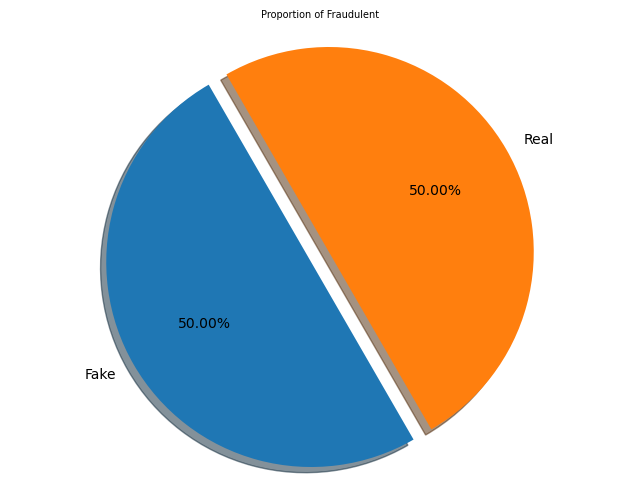

In [ ]:
# Checking for distribution of class label (percentages belonging to real job listing and percentages belonging to fraudulent job listing)
# in the dataset, t means fraudulent listing and f means real listing

# Plotting pie chart for the data

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 't'].count(), data.fraudulent[data['fraudulent']== 'f'].count()]
explode = (0, 0.1) # the explode function determines how the portions will appear
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [14]:
# let's visualize which country is posting the most jobs!
# for this task, we will use the location column.
# the location data is in the form: county, state, city.
# however, we just need to know the country.

def split(location):
    l = location.split(',') # split the location where the comma is
    return l[0] # return the country only

data['country'] = data.location.apply(split)
data['country']

2875     US
10809    US
7704     US
15470    NZ
4484     US
         ..
17827    US
17828    AU
17829    PL
17830    US
17831    US
Name: country, Length: 1732, dtype: object

In [15]:
# let's determine how many unique country values there are
data['country'].nunique()

47

In [16]:
# top 10 countries that post jobs
data['country'].value_counts()[:11]

country
US    1257
GB     132
AU      47
        45
GR      40
CA      33
NZ      20
IN      19
DE      16
MY      12
PH       9
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

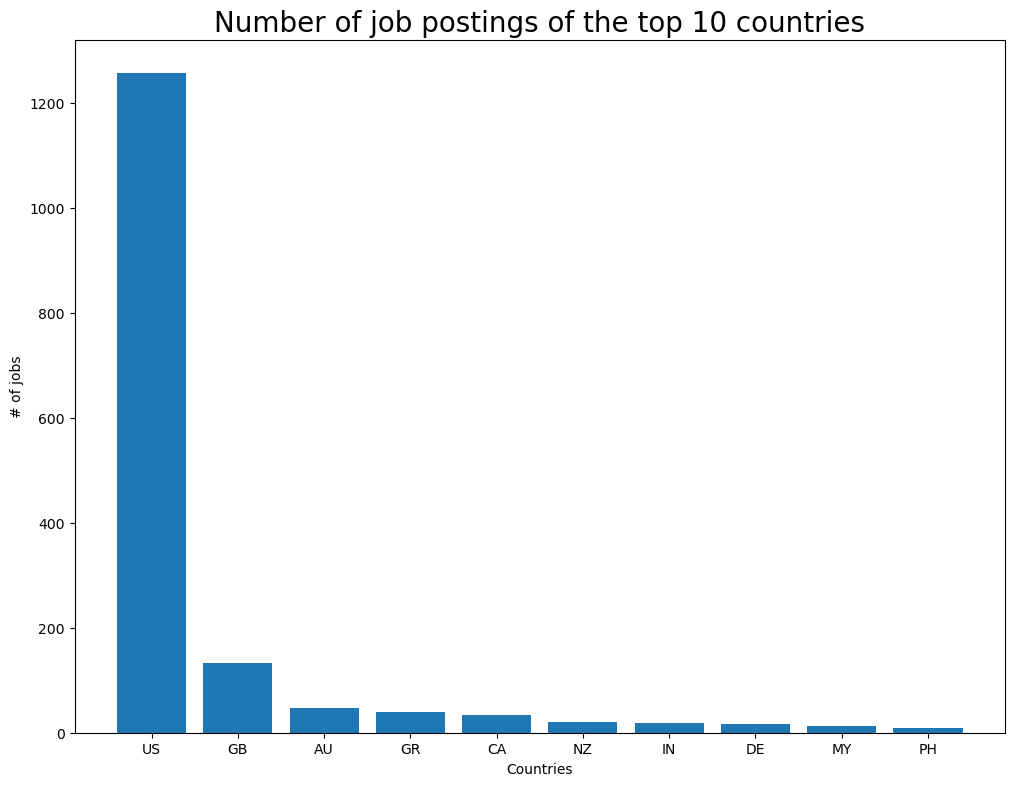

In [17]:
# create a dictionary with top 10 countries
country = dict(data.country.value_counts()[:11])
del country[' '] # delete the countries with space values (they are missing information from the dataset)
plt.figure(figsize=(12,9))
plt.title('Number of job postings of the top 10 countries', size=20)
plt.bar(country.keys(), country.values()) # x-axis, y-axis
plt.ylabel('# of jobs', size=10)
plt.xlabel('Countries', size=10)

In [18]:
country.keys()

dict_keys(['US', 'GB', 'AU', 'GR', 'CA', 'NZ', 'IN', 'DE', 'MY', 'PH'])

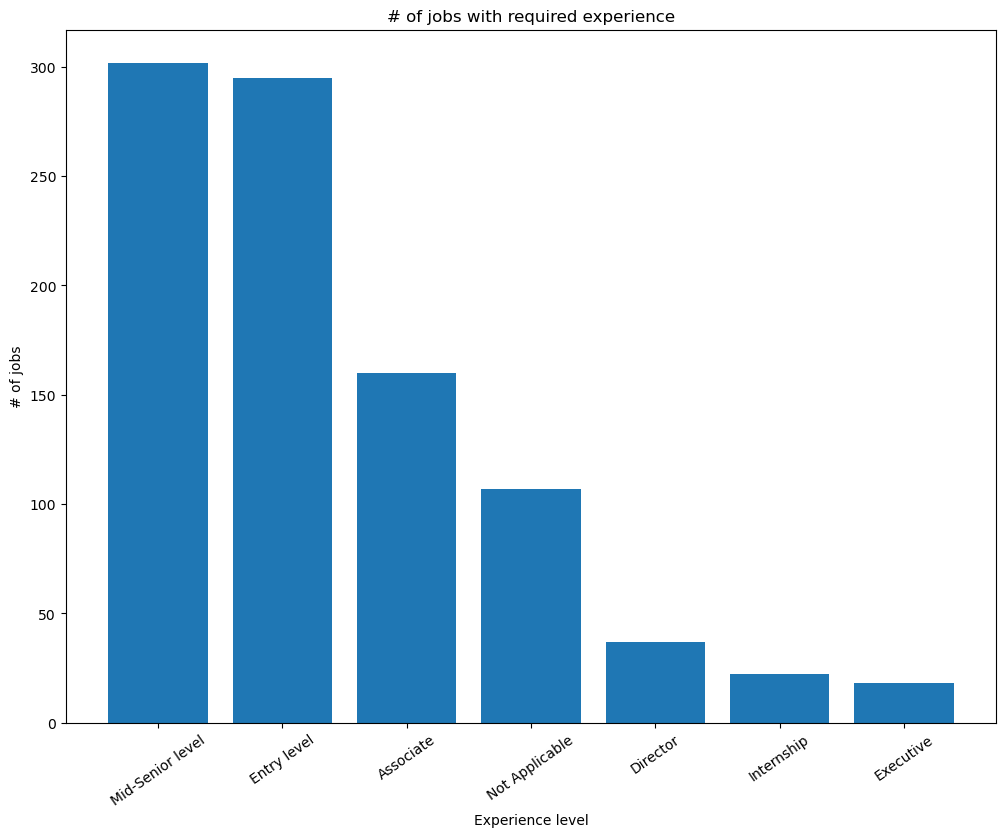

In [19]:
# visualizing the jobs based on required experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('# of jobs with required experience')
plt.xlabel('Experience level', size=10)
plt.ylabel('# of jobs', size=10)
plt.xticks(rotation= 35)
plt.show()

In [20]:
# This data in unbalanced-- it contains 95% of real jobs and only 5% of fake jobs. Therefore, we must balance it.

In [21]:
# display the most frequent job roles
print(data.title.value_counts()[:10])

title
English Teacher Abroad                                                  22
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Administrative Assistant                                                18
Customer Service Representative                                         18
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Data Entry                                                              10
Payroll Clerk                                                           10
Name: count, dtype: int64


In [22]:
# let's combine all the text for each datapoint, so we can create a word cloud of the most common words in the job listing titles
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [23]:
# we need to get rid of the html tags from the web scrapping
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

data['text'] = data['text'].apply(remove_html_tags)

In [24]:
data.head()

,fraudulent,text
2875,f,"Director of Training US, NJ, Newark Places Sen..."
10809,f,"Customer Service Associate US, CO, Englewood ..."
7704,f,"Automotive Sales Manager US, CA, Costa Mesa Ab..."
15470,f,"PHP Developers NZ, , Auckland & Wellington Sil..."
4484,f,"Epic Adventurist US, WI, WAUKESHA Lasertag Adv..."


In [25]:
## Understanding the common words used in the text: Wordcloud

In [26]:
# we will make 3 kinds of wordclouds.
# Wordcloud 1: visualize ALL the words in the data using the wordcloud plot
# Wordcloud 2: visualize common words in real job postings
# Wordcloud 3: visualize common words in fraudulent job postings

from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]])

In [27]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(all_words)

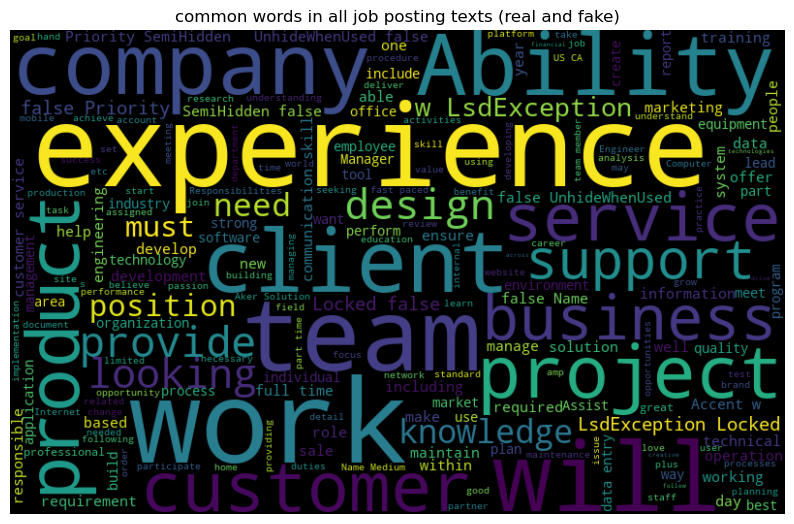

In [28]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('common words in all job posting texts (real and fake)')
plt.show()

In [29]:
# common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']=='f']])
wordcloud = WordCloud(width = 800, height= 500, random_state=21, max_font_size=120).generate(real_post)



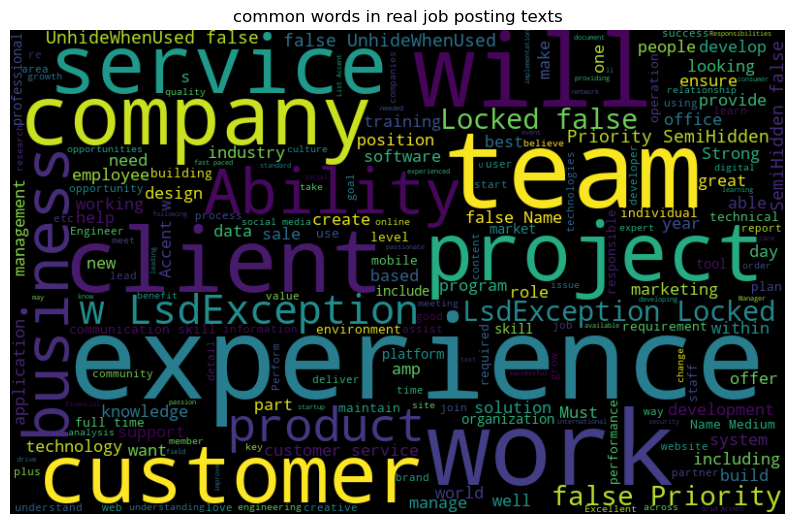

In [30]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('common words in real job posting texts')
plt.show()


In [31]:
# common words in fake job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']=='t']])
wordcloud = WordCloud(width = 800, height= 500, random_state=21, max_font_size=120).generate(real_post)



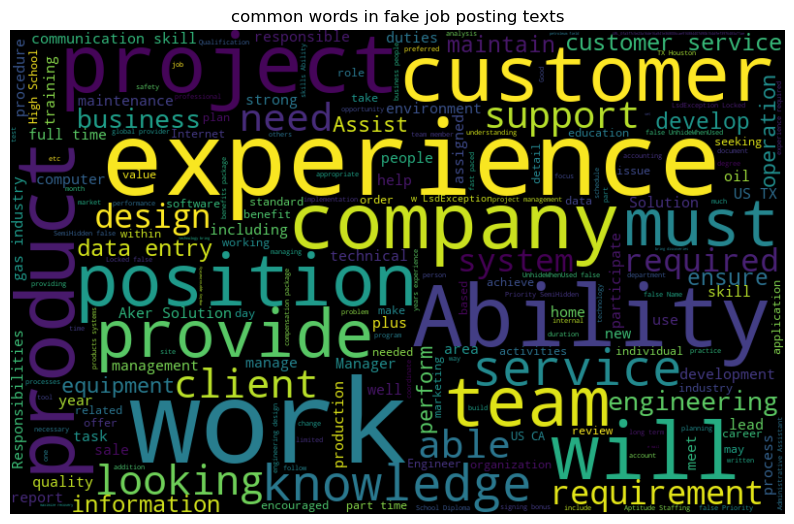

In [32]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('common words in fake job posting texts')
plt.show()


In [33]:
## data preparation

In [34]:
# Natural Language Tookkit (NLTK)
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/palomavaldes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [36]:
# loading the stopwords
stop_words = set(stopwords.words("english"))

In [37]:
# converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [38]:
# removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [42]:
data['text'][1046]

'data scientist gb, lnd, shoreditch adthena uk’s leading competitive intelligence service google search advertisers. adthena loved major brands digital agencies alike provides great opportunity work high growth adtech space. patent-pending technologies provide unparalleled accuracy clients understand competitors’ keywords, budgets, spend, cpcs, adcopy more. profitable, fast growing love do. want come work big data challenges using whatever new technologies consider best job? part small team fast growing company great colleagues using best tools money buy? work bright, centrally located offices shoreditch? (old street roundabout). looking data scientist / statistician join team. use technologies like sql, mongo, hadoop, c#, .net, python, rabbitmq, aws more. open ideas solve problems faster better. building "another-#url_744e4ea4bc34681b137c8ce0e900ee3afe9ef7a38423dd76a3acbf8f07821c56#", using technology analyse masses data pinpoint solutions tricky client problems specifically search en

In [40]:
from sklearn.model_selection import train_test_split

# splitting dataset in train and test
X_train, X_test, Y_train, Y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [41]:
# what does X_train and Y_train contain
print(Y_train)
print(X_train)

3242     t
11756    t
16717    f
17577    t
1046     f
        ..
9068     f
17602    t
4737     t
17646    t
11389    t
Name: fraudulent, Length: 1212, dtype: object
3242     class - cdl driver - doubles endorsed us, oh, ...
11756    ust testing technician iii us, ca, bakersfield...
16717    project manager pk, sd, karachi creative agenc...
17577    human resources assistant/executive assistant/...
1046     data scientist gb, lnd, shoreditch adthena uk’...
                               ...                        
9068     big data developer ee, 37, tallinn company adc...
17602    network marketing us, nh, looking make anywher...
4737     need 25 agents growing company-see us, va, sta...
17646    admin assistant us, md, baltimore job descript...
11389    project manager: mechanical us, ca, bakersfiel...
Name: text, Length: 1212, dtype: object


In [43]:
# the model cannot process text data so we need to convert our data into vector format.
# we will be using Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)

In [44]:
# examine the document-term matrix
X_train_dtm

# display X_train data 
print(X_train_dtm)

# this is matrix representation, non-0 valued cells are not printed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 201861 stored elements and shape (1212, 15663)>
  Coords	Values
  (0, 181)	1
  (0, 651)	1
  (0, 732)	1
  (0, 994)	1
  (0, 1005)	1
  (0, 1291)	1
  (0, 1321)	1
  (0, 1476)	1
  (0, 1628)	1
  (0, 1860)	1
  (0, 2093)	2
  (0, 2254)	1
  (0, 2255)	1
  (0, 2265)	1
  (0, 2513)	2
  (0, 2568)	1
  (0, 2612)	1
  (0, 2703)	3
  (0, 2721)	1
  (0, 2727)	1
  (0, 2747)	2
  (0, 2797)	2
  (0, 2992)	1
  (0, 3036)	1
  (0, 3348)	2
  :	:
  (1211, 13115)	2
  (1211, 13193)	1
  (1211, 13205)	1
  (1211, 13422)	3
  (1211, 13442)	1
  (1211, 13578)	1
  (1211, 13645)	1
  (1211, 13674)	1
  (1211, 13749)	1
  (1211, 13814)	1
  (1211, 13831)	1
  (1211, 13946)	1
  (1211, 13979)	2
  (1211, 14149)	1
  (1211, 14198)	1
  (1211, 14277)	1
  (1211, 14578)	1
  (1211, 14655)	1
  (1211, 14765)	1
  (1211, 15154)	1
  (1211, 15187)	1
  (1211, 15213)	1
  (1211, 15217)	4
  (1211, 15230)	1
  (1211, 15318)	1


In [46]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 81534 stored elements and shape (520, 15663)>

In [47]:
## model building & evaluation

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [49]:
## Naive Bayes

In [50]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally, if there are data in the form of this long text, it is better to use %time to give the time taken by the system for execution

nb = MultinomialNB()
%time nb.fit(X_train_dtm, Y_train)

CPU times: user 10.4 ms, sys: 10.2 ms, total: 20.6 ms
Wall time: 25.5 ms


MultinomialNB()

In [51]:
Y_pred_nb = nb.predict(X_test_dtm)
print(Y_pred_nb)

['t' 'f' 't' 't' 't' 't' 'f' 't' 'f' 'f' 't' 'f' 'f' 't' 'f' 't' 'f' 'f'
 'f' 't' 't' 't' 't' 'f' 'f' 'f' 't' 't' 't' 'f' 'f' 't' 'f' 't' 'f' 't'
 't' 't' 'f' 't' 'f' 't' 't' 'f' 'f' 't' 'f' 't' 'f' 't' 't' 'f' 'f' 't'
 'f' 't' 't' 't' 'f' 'f' 't' 'f' 'f' 't' 't' 't' 'f' 'f' 't' 't' 't' 't'
 't' 't' 'f' 'f' 't' 'f' 'f' 't' 'f' 't' 'f' 't' 'f' 'f' 'f' 't' 't' 'f'
 't' 't' 'f' 't' 't' 't' 'f' 'f' 't' 'f' 't' 't' 't' 'f' 't' 't' 'f' 'f'
 'f' 't' 'f' 't' 't' 't' 't' 'f' 't' 't' 'f' 't' 'f' 'f' 'f' 't' 't' 't'
 't' 't' 'f' 'f' 't' 't' 'f' 't' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 't' 'f'
 'f' 't' 'f' 't' 'f' 't' 't' 't' 't' 'f' 't' 'f' 'f' 'f' 't' 'f' 't' 't'
 'f' 'f' 't' 't' 't' 't' 'f' 'f' 't' 'f' 'f' 'f' 'f' 'f' 'f' 't' 'f' 't'
 't' 'f' 'f' 'f' 't' 'f' 'f' 't' 'f' 'f' 't' 'f' 't' 'f' 'f' 't' 't' 'f'
 'f' 't' 't' 'f' 'f' 'f' 't' 'f' 'f' 'f' 't' 't' 't' 't' 't' 'f' 'f' 't'
 't' 't' 'f' 't' 't' 't' 'f' 't' 'f' 't' 'f' 'f' 't' 'f' 't' 'f' 't' 'f'
 't' 'f' 'f' 't' 'f' 'f' 'f' 't' 't' 't' 'f' 'f' 't

Classification Accuracy: 0.8961538461538462
Classification Report

              precision    recall  f1-score   support

           f       0.91      0.89      0.90       269
           t       0.88      0.90      0.89       251

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

Confusion Matrix

[[239  30]
 [ 24 227]]


Text(95.72222222222221, 0.5, 'Truth')

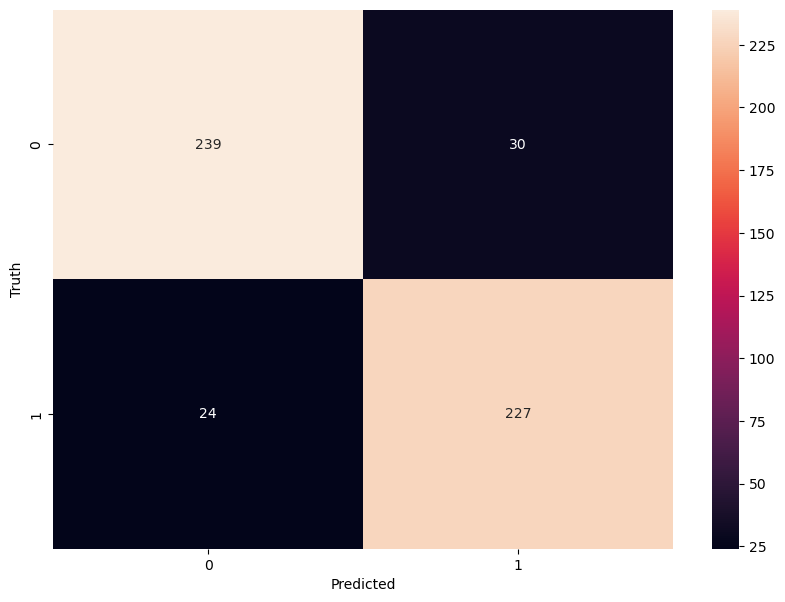

In [52]:
accuracy_score(Y_test, Y_pred_nb)

print("Classification Accuracy:", accuracy_score(Y_test, Y_pred_nb))
print("Classification Report\n")
print(classification_report(Y_test, Y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test, Y_pred_nb))

cm = confusion_matrix(Y_test, Y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
## decision tree classifier

In [54]:
# instantiate a decision tree classifier
dt = DecisionTreeClassifier()

In [55]:
# train the model
# using X_train_dtm (timing it with %time )

%time dt.fit(X_train_dtm, Y_train)

CPU times: user 540 ms, sys: 24 ms, total: 564 ms
Wall time: 781 ms


DecisionTreeClassifier()

In [56]:
# make class predicitions for X_test_dtm
Y_pred_class = dt.predict(X_test_dtm)

In [57]:
# model accuracy
print("Classification Accuracy:", accuracy_score(Y_test, Y_pred_class))
print("Classification Report\n")
print(classification_report(Y_test, Y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test, Y_pred_class))

Classification Accuracy: 0.8384615384615385
Classification Report

              precision    recall  f1-score   support

           f       0.87      0.81      0.84       269
           t       0.81      0.87      0.84       251

    accuracy                           0.84       520
   macro avg       0.84      0.84      0.84       520
weighted avg       0.84      0.84      0.84       520

Confusion Matrix

[[218  51]
 [ 33 218]]


Text(95.72222222222221, 0.5, 'Truth')

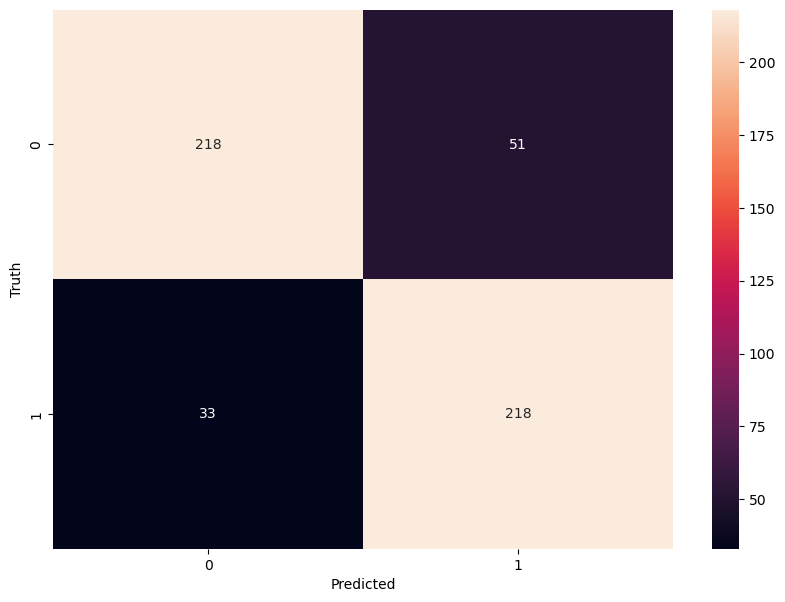

In [58]:
# confusion matrix

import seaborn as sn
cm = confusion_matrix(Y_test, Y_pred_class)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
## building a predictive system

In [60]:
# let's predict a data point
X_test

8949     production engineer us, tx, houston aker solut...
5406     web agency sales business development associat...
17639    hiring part time workers cash position. au, ns...
4650     make easy money home us, fl, central fl, nort ...
12433    sales professional- smb us, md, baltimore maki...
                               ...                        
15710    software engineer (delhi role, singapore compa...
2277     food beverage director responsible directing o...
1480     senior software engineers, c++ gr, i, marousi ...
12023    .net developer nl, nh, hilversum mediamonks bi...
17716    sales associate home security us, il, chicago ...
Name: text, Length: 520, dtype: object

In [62]:
print(X_test[2277])

food beverage director responsible directing outlets, catering, stewarding andbanqueting operations hotel make sure accomplishment food andbeverage quality. also responsible applying developing sales marketing strategies ofthe catering department give effective profitability hotel excellentservice satisfaction customer. manage beverage food operation including food preparation, cateringfunctions, food service lounge service. also responsible checking observing budget food andbeverage, handle storage receiving food beverage items. responsible hiring, recruiting, supervising training food andbeverage staff obey local, state federal laws company standard. * budgeting, planning controlling financial needs.* quality control operational efficiency.* ability program design develop.* able take responsibility profit loss.* responsible planning menu, promotions events parties.* tracking programs a&amp;g, a&amp;p sales outlets created.* take responsibility entire operations catering managers food

In [63]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping & receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]

In [64]:
# we need to convert this text to vector form
input_data_features = vect.transform(input_text)

# making prediction
prediction = dt.predict(input_data_features)
print(prediction)

if (prediction[0]=='t'):
    print('Prediction: Fraudulent job')
else:
    print('Prediction: Real job')

['f']
Prediction: Real job


In [66]:
# let's check if the prediction was correct
print(Y_test[2277])

t
